In [1]:
# This are all the libraries we will probably be using
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create the 'Model' like previous notebook
class Model(nn.Module): # It inherits 'nn.Module'
    def __init__(self, in_feautures=4, h1=3, h2=9, out_feautures=3):
        super().__init__() # now we are inheriting our 'nn.Module'
        self.fc1 = nn.Linear(in_feautures, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_feautures)
        
    # the 'forward' func to help push the neural networks forward 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))
        
        return x

In [3]:
# Pick a random seed for randomization
torch.manual_seed(41)
# Then create an instance of model
# A var assignment in short
model = Model()

In [4]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [5]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Change last columns values from names to integers/floats
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

In [7]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
my_df.columns = my_df.columns.str.replace('species', 'variety')

In [9]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
# Train, Test and Split! Set x, y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [11]:
# Convert to numpy arrays
X = X.values
y = y.values

In [12]:
# Now 'X' is an array
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Run our train test split
# initialize the trainers and testers of the model
# The test size is going to be %20 and our train size will be %80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [15]:
# We are making it 'FloatTensor', because if you remember on cell 11
# the values of X were floats
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [17]:
# Set the criteria of our model to measure the error
# of how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# The 'model.parameters' is taking all the data/functions from the class...
# ...by going from fc1 to h1 etc
# Choose Adam ptimizer, lr = learning rate(if error doesn't go down as we learn, after a bunch of iterations(epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [18]:
# Just to let you know what I was talking about in the above cell
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

BE CAREFUL OF THE VAR HERE AS PYTHON IS CASE SENSITIVE

In [19]:
# Time to train our models
# Epoch? (one run thru all the data in our network)
epochs = 100

# keeping track of our losses to check if our AI is actually learning

losses= []
for i in range(epochs):
    # go forward and get a prediction
    # Whether its a virginica, versicolor or setosa.....
    # in other words/floats :) 1.0, 2.0 or 3.0
    y_pred = model.forward(X_train) # Get predicted results
    
    # measure the loss/erro, gonna be high at first
    loss = criterion(y_pred, y_train) # predicted values VS the y_train(the initial data set)
    
    # Keep track of our losses
    losses.append(loss.detach().numpy())
    
    # print every 10 epochs
    
    if i % 10 == 0:
        print(f"Epoch{i} and loss: {loss}")
        
    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch0 and loss: 1.1154742240905762
Epoch10 and loss: 1.0848549604415894
Epoch20 and loss: 1.0418528318405151
Epoch30 and loss: 0.9922894239425659
Epoch40 and loss: 0.889296293258667
Epoch50 and loss: 0.7990636825561523
Epoch60 and loss: 0.7101766467094421
Epoch70 and loss: 0.6331765651702881
Epoch80 and loss: 0.5698632597923279
Epoch90 and loss: 0.522183895111084


Text(0.5, 0, 'Epoch')

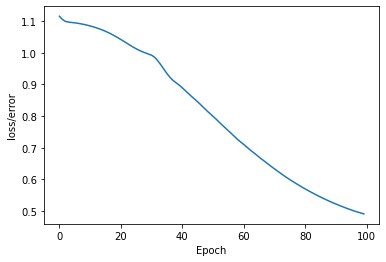

In [21]:
# Lets graph the above

plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel("Epoch")

# The flattening in the graph around 70-80 shows that our Ai is LEARNING